# Jane Chinwuko
# Batch number: DS2307


### Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

### Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
##### • Country code
##### • Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
##### • Restaurant Id: Unique id of every restaurant across various cities of the world
##### • Restaurant Name: Name of the restaurant
##### • Country Code: Country in which restaurant is located
##### • City: City in which restaurant is located
##### • Address: Address of the restaurant
##### • Locality: Location in the city
##### • Locality Verbose: Detailed description of the locality
##### • Longitude: Longitude coordinate of the restaurant&#39;s location
##### • Latitude: Latitude coordinate of the restaurant&#39;s location
##### • Cuisines: Cuisines offered by the restaurant
##### • Average Cost for two: Cost for two people in different currencies ��
##### • Currency: Currency of the country
##### • Has Table booking: yes/no
##### • Has Online delivery: yes/ no
##### • Is delivering: yes/ no
##### • Switch to order menu: yes/no
##### • Price range: range of price of food
##### • Aggregate Rating: Average rating out of 5
##### • Rating color: depending upon the average rating color
##### • Rating text: text on the basis of rating of rating
##### • Votes: Number of ratings casted by people

### Problem statement : In this dataset predict 2 things –
##### 1) Average Cost for two
##### 2) Price range

# These are regression problems

In [1]:
#Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
#Load the two datasets into a Pandas DataFrame
country = pd.read_excel('Country-Code.xlsx')
zomato = pd.read_csv('zomato.csv', encoding='ISO-8859-1')

## Exploratory Data Analysis

In [3]:
#Viewing the first 5 rows of the country dataset
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [4]:
#Viewing the first 5 rows of the zomato dataset
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
# Viewing the dimensions of the country dataset
country.shape

(15, 2)

The country dataset is made up of 15 rows and 2 columns

In [6]:
# Viewing the dimensions of the zomato dataset
zomato.shape

(9551, 21)

The country dataset is made up of 9551 rows and 21 columns

In [7]:
#This returns the unique occurrences in the Country Code column for our country dataset.
country['Country Code'].unique()

array([  1,  14,  30,  37,  94, 148, 162, 166, 184, 189, 191, 208, 214,
       215, 216], dtype=int64)

In [8]:
#This returns the unique occurrences in the Country Code column for our zomato dataset.
zomato['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208], dtype=int64)

Both dataframes have same unique occurrence of the Country Code column.

In [9]:
#Merging the two datasets to form one dataset
zomato_restaurant = country.merge(zomato, how = 'right')

We used the merger operation in pandas to merge the country dataframe and the zomato dataframe. Since country code is unique in both dataframe, on merging, only one country code is retained. 

In [10]:
#Viewing the first 10 rows of our merged dataset
zomato_restaurant.head(10)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Phillipines,6317637,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,162,Phillipines,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,162,Phillipines,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,162,Phillipines,6318506,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,162,Phillipines,6314302,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,162,Phillipines,18189371,Din Tai Fung,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,162,Phillipines,6300781,Buffet 101,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,162,Phillipines,6301290,Vikings,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,162,Phillipines,6300010,Spiral - Sofitel Philippine Plaza Manila,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,162,Phillipines,6314987,Locavore,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [11]:
# Viewing the dimensions of the array for our new dataset
zomato_restaurant.shape

(9551, 22)

Our new dataset contains 9551 rows and 22 columns

In [12]:
#Viewing the columns present in the dataset
columns = zomato_restaurant.columns
columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
#Displays the basic information about the columns in the dataset
zomato_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

The datatypes present in our dataset are int64(5 variables), object(14 variables) and float64(3 variables). We have missing values in the Cuisines column.

In [14]:
#Displays the unique value for all features
zomato_restaurant.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [15]:
#Generating the descriptive statistics of all the numerical features in the dataset
zomato_restaurant.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


The is high difference between the mean and median of the Average Cost for two and Votes columns. We need to check for outliers.

In [16]:
#displaying the descriptive statistics of our categorical variables
zomato_restaurant.describe(include='object')

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,15,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,India,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,8652,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [17]:
#check for missing values
zomato_restaurant.isna().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

We have missing value in the Cuisines column.

In [18]:
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(zomato_restaurant)

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social        

India is the country with the highest number of restaurants. Followed by the United States.

In [19]:
#dropping the Restaurant ID column
zomato_restaurant.drop('Restaurant ID',axis=1,inplace=True)

We are dropping this column because we do not need it in our analysis.

In [20]:
# Display the count of Average Cost for two
zomato_restaurant['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

In [21]:
# Display the count of Country
zomato_restaurant['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Indian has 8652 Restaurants

In [22]:
# Display the count of Restaurants
zomato_restaurant['Restaurant Name'].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

We have more Cafe Coffee Day than other shops

In [23]:
# The Restaurants by Price Range
Cuisine_rating=(zomato_restaurant.groupby(['Country'], as_index=False)['Price range'].mean())
Cuisine_rating.columns = ['Country', 'Price range' ]
Cuisine_rating.sort_values(['Price range'],ascending=False).head(15)

,Country,Price range
7,Qatar,3.650000
8,Singapore,3.650000
9,South Africa,3.583333
1,Brazil,3.400000
6,Phillipines,3.363636
12,UAE,3.216667
5,New Zealand,3.150000
4,Indonesia,2.952381
10,Sri Lanka,2.850000
11,Turkey,2.823529


Qatar and Singapore both have average price range of 3.650000

In [24]:
#count Currency used by each country
zomato_restaurant['Currency'].groupby([zomato_restaurant['Country']]).value_counts()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(£)                  80
United States   Dollar($)                  434
Name: Currency, dtype: int64

The various countries and their currency. Australia, Canada, Singapore and United States accepts dollars

In [25]:
#display of the grouping of  Aggregate rating, Rating color, and Rating text column
overall_ratings = zomato_restaurant.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
overall_ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Colour, text, and aggregate rating are related to one another, as the information above explains. We assigned the ratings the following colour:
##### Rating 0 — White — Not rated
##### Rating 1.8 to 2.4 — Red — Poor
##### Rating 2.5 to 3.4 — Orange — Average
##### Rating 3.5 to 3.9 — Yellow — Good
##### Rating 4.0 to 4.4 — Green — Very Good
##### Rating 4.5 to 4.9 — Dark Green — Excellent
We have high count of no ratings. The maximum rating is between 2.5 to 3.4(Average)

## Data Visualization (Univariate, Biavariate and Multivariate Analysis)

Text(0.5, 1.0, 'Top countries for Zomato')

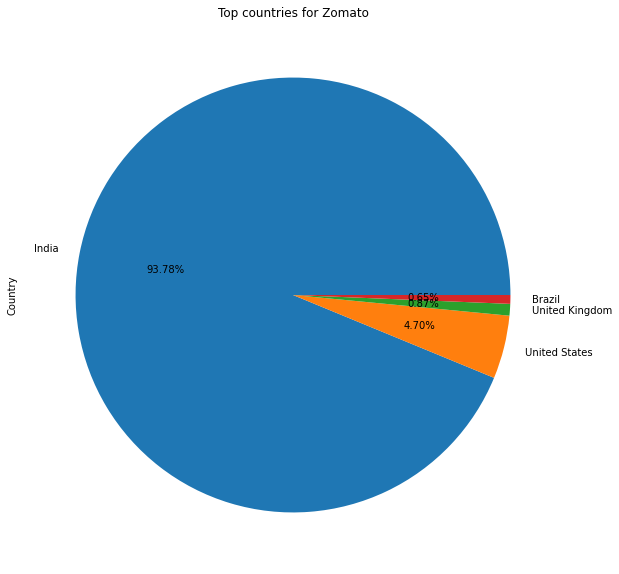

In [26]:
#Percentage count of Country
plt.figure(figsize=(10,10))
zomato_restaurant['Country'].value_counts()[:4].plot(kind='pie', autopct = '%1.2f%%')
plt.title("Top countries for Zomato")

India, the United States, the United Kingdom and Brazil are the top 4 countries using Zomato.

Text(0.5, 1.0, 'Top Cities on Zomato')

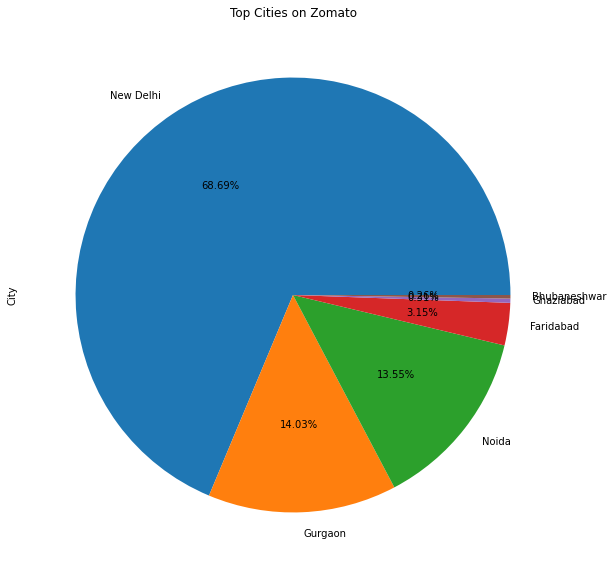

In [27]:
#Percentage count of the top 6 cities with Zomato services
plt.figure(figsize=(10,10))
zomato_restaurant['City'].value_counts()[:6].plot(kind='pie', autopct = '%1.2f%%')
plt.title("Top Cities on Zomato")

The toppest city is New Delhi.

<AxesSubplot:ylabel='Aggregate rating'>

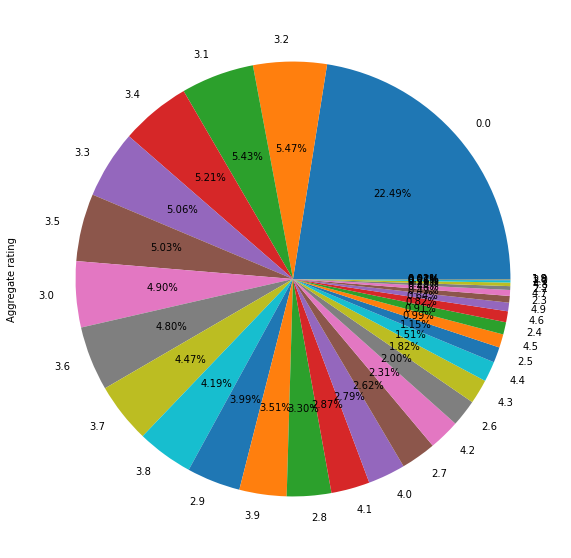

In [28]:
#Percentage count of the Aggregate rating
plt.figure(figsize=(10,10))
zomato_restaurant['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%1.2f%%')

We can see from the plot that 22.49% of the customers did not rate the Restaurant

Text(0.5, 1.0, 'The top 20 Cuisines on Zomato')

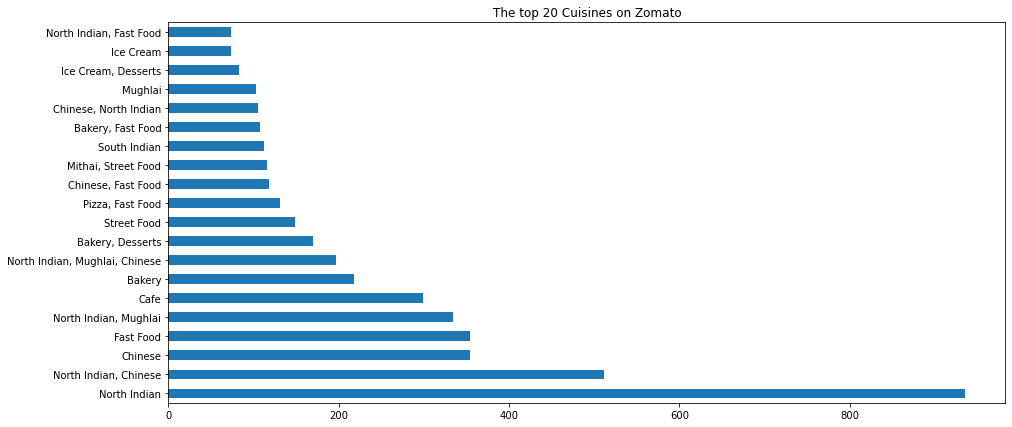

In [29]:
# Display of the top 20 Cuisines on Zomato
zomato_restaurant['Cuisines'].value_counts().head(20).plot.barh(figsize=(15,7))
plt.title('The top 20 Cuisines on Zomato')

North Indian has the highest number of cuisines. North Indian Cuisine is strongly influenced by the Mughal way of cooking.

Text(0.5, 1.0, 'The top 15 Restaurant Name')

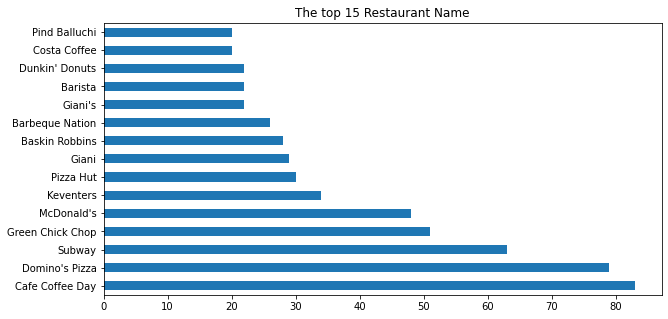

In [30]:
# Display of the top 15 Restaurant Name
zomato_restaurant['Restaurant Name'].value_counts().head(15).plot.barh(figsize=(10,5))
plt.title('The top 15 Restaurant Name')

Cafe coffee day has the highest restaurant name. With the creation of Cafe Coffee Day, he ignited a trend in India where people congregate in different settings to interact over non-alcoholic beverages.

Text(0.5, 1.0, 'The top 10 cities with the most number of restaurants')

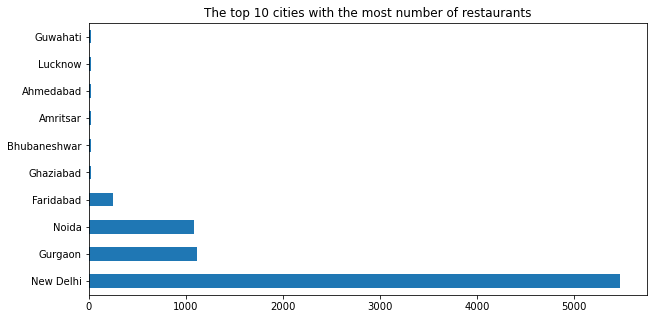

In [31]:
# Display of the top 10 cities with the most number of restaurants
zomato_restaurant['City'].value_counts().head(10).plot.barh(figsize=(10,5))
plt.title('The top 10 cities with the most number of restaurants')

India has the highest number of restaurants

In [32]:
# Display the count of Price range
zomato_restaurant['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

Text(0.5, 1.0, 'Price range distribution')

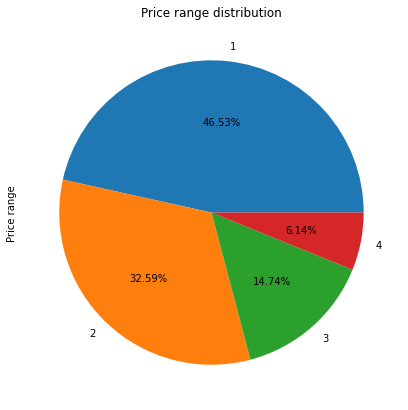

In [33]:
#Percentage count of Price range
plt.figure(figsize=(10,7))
zomato_restaurant['Price range'].value_counts().plot(kind='pie', autopct = '%.2f%%')
plt.title("Price range distribution")

From the above, we can see that the Price Range 1 comprises the majority of customers.

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

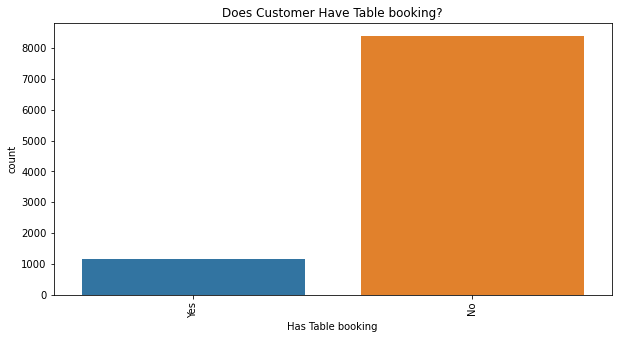

In [34]:
# countplot showing if the customer has table booking
plt.figure(figsize=(10,5))
sns.countplot(x='Has Table booking',data=zomato_restaurant)
plt.title('Does Customer Have Table booking?')
plt.xticks(rotation = 90)

Most of the customers did not have table bookings

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

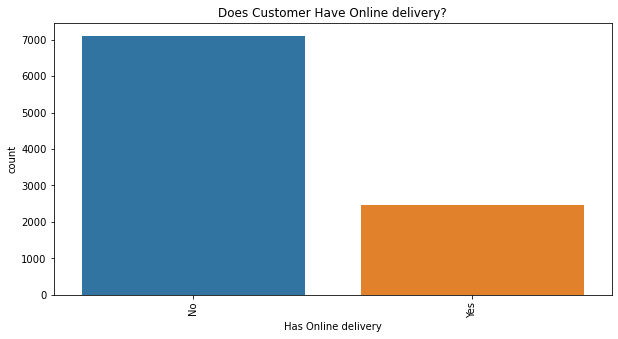

In [35]:
# countplot showing if the customer has Online delivery
plt.figure(figsize=(10,5))
sns.countplot(x='Has Online delivery',data=zomato_restaurant)
plt.title('Does Customer Have Online delivery?')
plt.xticks(rotation = 90)

Few customers have Online delivery

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

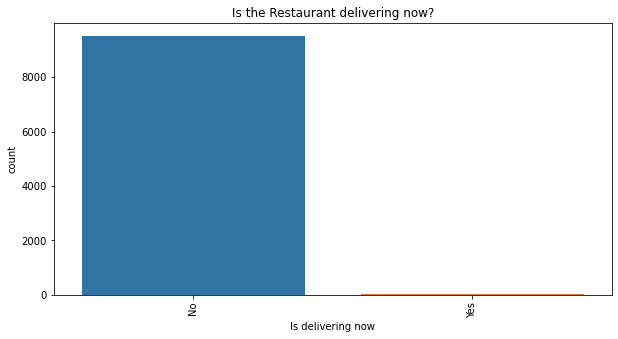

In [36]:
# countplot showing if the the Restaurant delivering now
plt.figure(figsize=(10,5))
sns.countplot(x='Is delivering now',data=zomato_restaurant)
plt.title('Is the Restaurant delivering now?')
plt.xticks(rotation = 90)

In most cases, the Restaurant is not delivering now.

<AxesSubplot:xlabel='Has Online delivery', ylabel='Votes'>

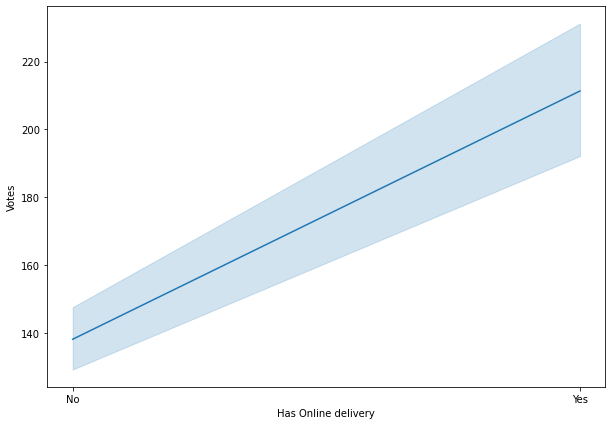

In [37]:
# lineplot showing the relatioship between votes and Has Online delivery column
plt.figure(figsize=(10,7))
sns.lineplot(y=zomato_restaurant["Votes"],x=zomato_restaurant["Has Online delivery"])

This lineplot indicates a higher number of votes from customers who selected online delivery.

In [38]:
#Countries having the online delivering options
zomato_restaurant.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Phillipines'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'UAE'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'New Zealand'),
  Text(10, 0, 'United Kingdom'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'South Africa'),
  Text(13, 0, 'Sri Lanka'),
  Text(14, 0, 'Turkey')])

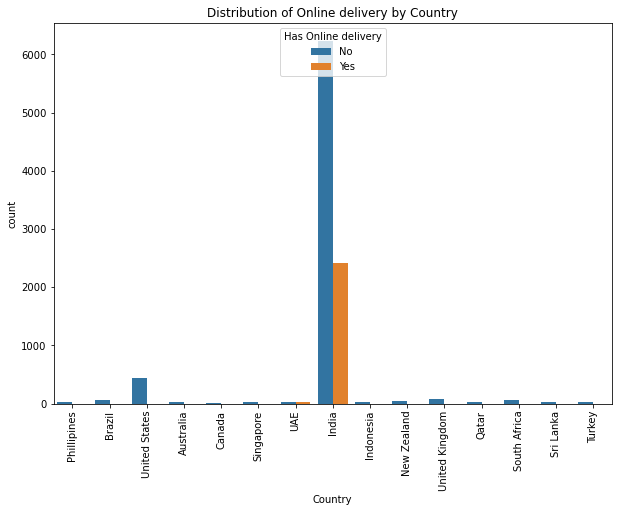

In [39]:
# countplot showing the Distribution of Online delivery by Country
plt.figure(figsize=(10,7))
sns.countplot(x='Country', hue='Has Online delivery', data=zomato_restaurant)
plt.title('Distribution of Online delivery by Country')
plt.xticks(rotation = 90)

### From the figures and plot, we can see that only India and the United Arab Emirates provide online deliveries.

In [40]:
#Countries delivering now
zomato_restaurant.groupby(['Country','Is delivering now']).size().reset_index()

,Country,Is delivering now,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,8618
4,India,Yes,34
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Phillipines'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'UAE'),
  Text(7, 0, 'India'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'New Zealand'),
  Text(10, 0, 'United Kingdom'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'South Africa'),
  Text(13, 0, 'Sri Lanka'),
  Text(14, 0, 'Turkey')])

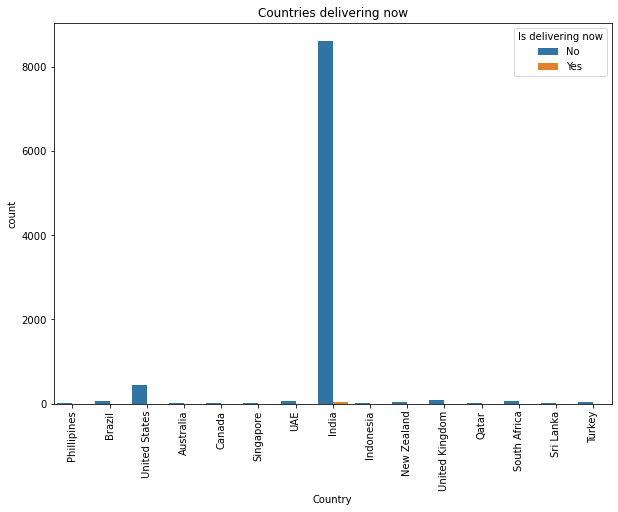

In [41]:
# countplot showing the Distribution of countries delivering now
plt.figure(figsize=(10,7))
sns.countplot(x='Country', hue='Is delivering now', data=zomato_restaurant)
plt.title('Countries delivering now')
plt.xticks(rotation = 90)

### We can also see that only India Is delivering now.

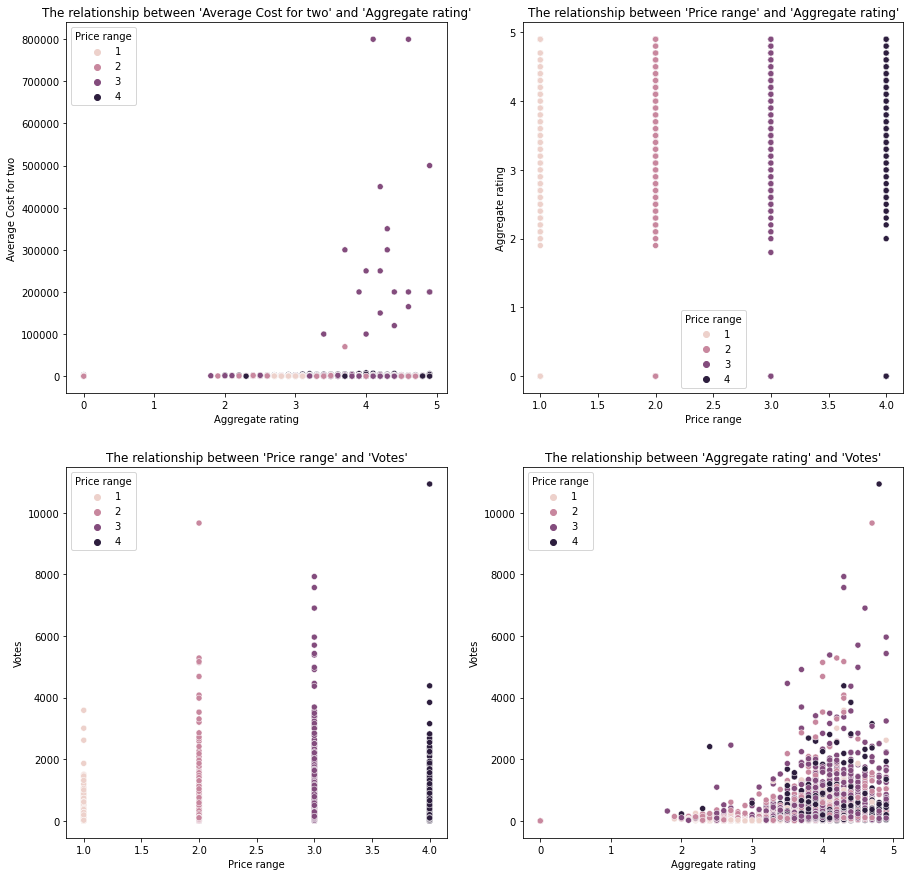

In [42]:
# These scatterplots are is used to visualize the relationships between variables
fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "Aggregate rating",
                y = "Average Cost for two",hue="Price range",
                data = zomato_restaurant).set(title = "The relationship between 'Average Cost for two' and 'Aggregate rating'");

sns.scatterplot(ax = axes[1],
                x = "Price range",
                y = "Aggregate rating", hue="Price range",
                data = zomato_restaurant).set(title = "The relationship between 'Price range' and 'Aggregate rating'");

sns.scatterplot(ax = axes[2],
                x = "Price range",
                y = "Votes",hue="Price range",
                data = zomato_restaurant).set(title = "The relationship between 'Price range' and 'Votes'");

sns.scatterplot(ax = axes[3],
                x = "Aggregate rating",
                y = "Votes", hue="Price range",
                data = zomato_restaurant).set(title = "The relationship between 'Aggregate rating' and 'Votes'");


From the first plot, we can see that higher the cost, the higher the rating. Price does not have an correlation with ratig and votes. 

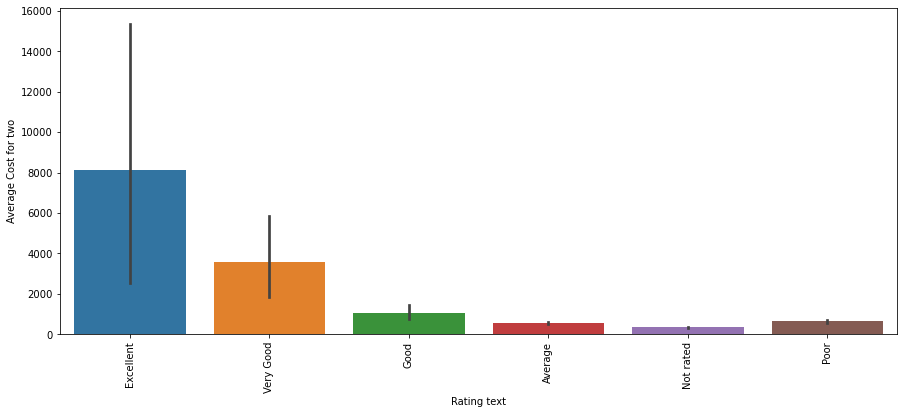

In [43]:
# barplot showing the relationship between Rating text and Average Cost for two
plt.figure(figsize = (15,6))
sns.barplot(x = 'Rating text',y='Average Cost for two',data = zomato_restaurant)
plt.xticks(rotation = 90)
plt.show()

We can see that most of the restaurants with higher cost were rated as excellent.

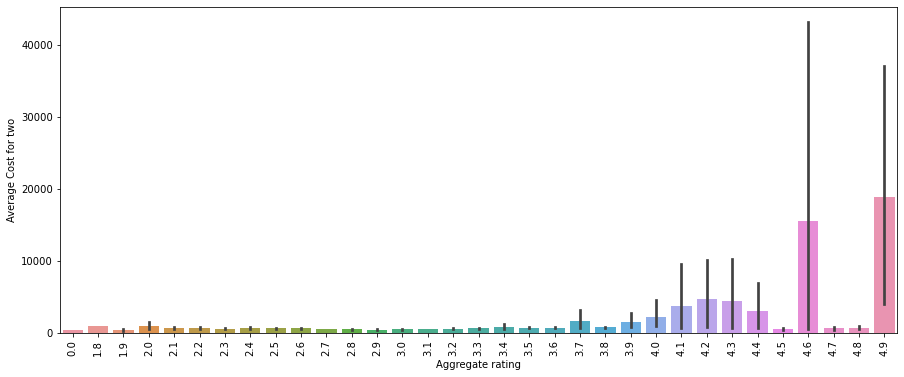

In [44]:
# barplot showing the Rating vs Average Cost for two
plt.figure(figsize = (15,6))
sns.barplot(x = 'Aggregate rating',y='Average Cost for two',data = zomato_restaurant)
plt.xticks(rotation = 90)
plt.show()

The average cost for two of top-rated restaurants is high.

<AxesSubplot:xlabel='Rating text', ylabel='Votes'>

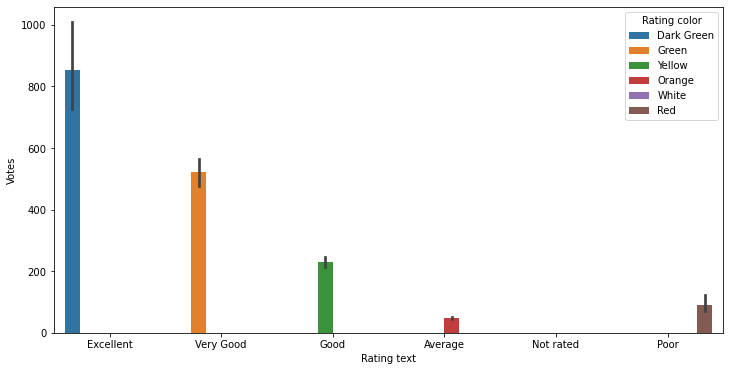

In [45]:
#barplot showing the rating based on votes
plt.figure(figsize=(12,6))
sns.barplot(x=zomato_restaurant["Rating text"],y=zomato_restaurant["Votes"],hue =zomato_restaurant["Rating color"])

We have more excellent ratings based on the customers vote.

## Data Pre-Processing

In [46]:
#checking for missing values
zomato_restaurant.isna().sum()

Country Code            0
Country                 0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

We have 9 missing values in the cuisines column. Since the count is small, we shall drop it.

In [47]:
#dropping the null values in the Cuisines column
zomato_restaurant = zomato_restaurant.dropna()

In [48]:
#display of the columns after missing values has been removed
zomato_restaurant.isna().sum()

Country Code            0
Country                 0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [49]:
# Printing the total number of duplicates across all the columns
duplicated = zomato_restaurant.duplicated()

print("The number of duplicates in the dataset is:", zomato_restaurant.duplicated().sum())

The number of duplicates in the dataset is: 0


There are no duplicates in our data

In [50]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(zomato_restaurant.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 zomato_restaurant[i] = le.fit_transform(zomato_restaurant[i])
zomato_restaurant.dtypes

Country Code              int64
Country                   int32
Restaurant Name           int32
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

We converted all categorical values to numberical values using the label encoder

<AxesSubplot:>

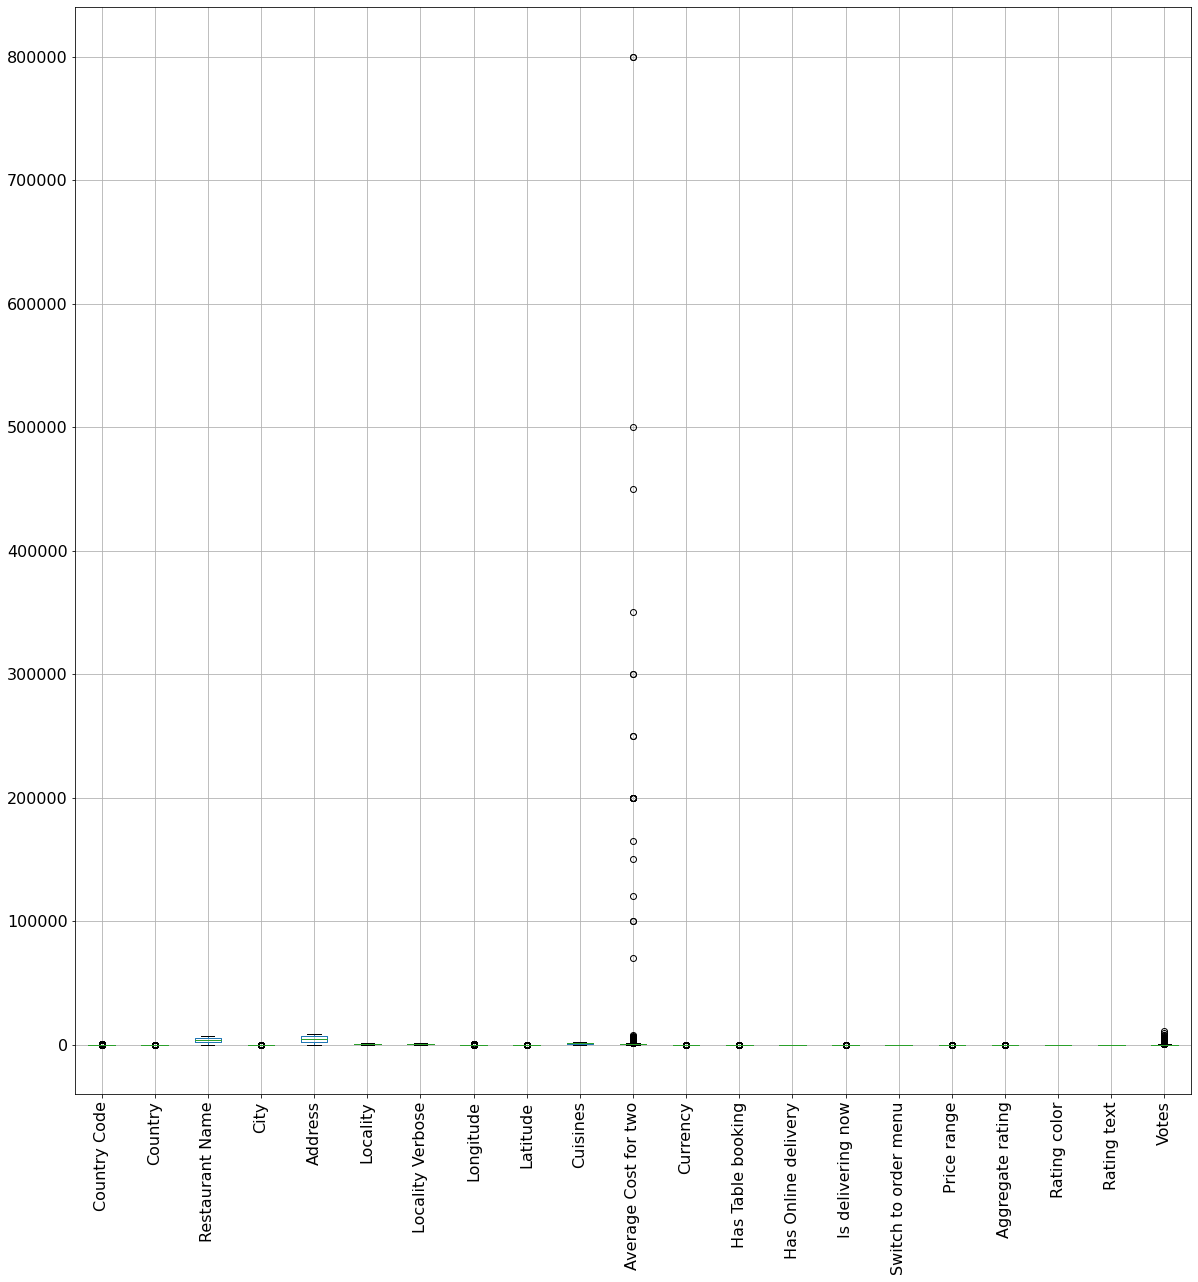

In [51]:
# Plotting the columns using boxplot to check if outliers have been removed
zomato_restaurant.boxplot(column=zomato_restaurant.columns.tolist(), figsize=(20,20), grid=True, rot=90, fontsize=16)

We can see from the boxplot that we have some outliers

In [52]:
# selected columns to check for outliers
columns = ['Average Cost for two',
       'Votes']

# create an empty list to store values
column_names = []
total_outliers = []
percentage = []
least_outlier = []

outlierFilter=None

# loop through all column list
for column in columns:
    # finding the 1st quartile
    q1 = zomato_restaurant[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = zomato_restaurant[column].quantile(0.75)

    # get the column minimum and median values
    min_value = zomato_restaurant[column].min()
    median_value = zomato_restaurant[column].median()

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # Get the array data for wine_red
    arr1 = zomato_restaurant[column]

    # Get the outliers in the columns using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    # get the min value of the outliers found
    min_value = round(min(outliers.values)) if len(outliers.values) > 0 else 0
    
    # calculate the percentage of the outliers found
    percentage_value = round((len(outliers.values) / len(arr1)) * 100, 2) if len(outliers.values) > 0 else 0
    
    # add values to the list
    column_names.append(column)
    total_outliers.append(len(outliers.values))
    least_outlier.append(min_value)
    percentage.append(percentage_value)
    
    # do this if outliers is less than or equal to 5%
    if round(percentage_value) <= 5 and len(outliers.values) > 0:
        # capping Outliers using IQR Ranges
        zomato_restaurant.loc[(zomato_restaurant[column] <= lower_bound), column] = lower_bound
        zomato_restaurant.loc[(zomato_restaurant[column] >= upper_bound), column] = upper_bound
        
    # do this if outliers is greater than 5%
    elif round(percentage_value) > 5 and len(outliers.values) > 0:
        # replacing outlier values with the median value
        zomato_restaurant.loc[(zomato_restaurant[column] <= lower_bound), column] = median_value
        zomato_restaurant.loc[(zomato_restaurant[column] >= upper_bound), column] = median_value


print('Outliers Table Summary')

# create a new dictionary
new_dict = {'Column Name': column_names, 'Number of Outliers': total_outliers, 'Least Value': least_outlier, 'Percentage Value': percentage}
# create a new dataframe table
new_df = pd.DataFrame(new_dict)
# display the new dataframe table
new_df

Outliers Table Summary


,Column Name,Number of Outliers,Least Value,Percentage Value
0,Average Cost for two,853,1400,8.94
1,Votes,1131,318,11.85


From the above, we checked and displayed the number of outliers present in our dataset.
#### We treated them by:
##### 1) Replacing outlier values with the median value if the percentage value is greater than 5%. 
##### 2) Capping the Outliers using IQR Ranges if the percentage value is less than 5%.

In [53]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = X_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(X_input.values, i) for i in range(X_input.shape[1])]

    return(vif_df)
X = zomato_restaurant.iloc[:,:]
calc_vif(X)

C:\Users\Omen\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Variables,VIF Value
0,Country Code,30.392508
1,Country,101.223161
2,Restaurant Name,3.887206
3,City,11.884385
4,Address,4.410979
5,Locality,5062.695375
6,Locality Verbose,4897.503086
7,Longitude,13.223786
8,Latitude,16.830201
9,Cuisines,4.815109


In [54]:
#Dropping density(has highest vif value)
X = zomato_restaurant.drop(['Locality','Country','Currency','Switch to order menu'],axis=1)

calc_vif(X)

,Variables,VIF Value
0,Country Code,3.065274
1,Restaurant Name,3.816825
2,City,10.256779
3,Address,4.279059
4,Locality Verbose,5.119788
5,Longitude,6.528531
6,Latitude,6.455705
7,Cuisines,4.555852
8,Average Cost for two,6.488640
9,Has Table booking,1.606962


We dropped those features with VIF values above 11 and the feature with NaN.

In [55]:
# splitting our data into X(Independant variables) and y(target variable)
X = zomato_restaurant.drop(['Average Cost for two'],axis = 1)
y = zomato_restaurant['Average Cost for two']

In [56]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Country Code,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,2.547817,0.862820,0.044085,-0.200637,1.614523,-1.543736,-1.524665,1.377641,-1.024849,-0.134480,-4.360670,2.690738,-0.58792,-0.059799,0.0,1.319726,1.407683,-1.978385,-0.465528,3.827680
1,2.547817,0.862820,-0.224598,-0.200637,0.588504,-0.206688,-0.230577,1.377315,-1.025915,0.236899,-4.360670,2.690738,-0.58792,-0.059799,0.0,1.319726,1.209860,-1.978385,-0.465528,-0.302485
2,2.547817,0.862820,-0.353098,-0.112841,0.053647,-1.108639,-1.095318,1.378352,-1.023399,1.325758,-4.360670,2.690738,-0.58792,-0.059799,0.0,2.424069,1.143919,-1.308391,1.894763,3.185534
3,2.547817,0.862820,0.491268,-0.112841,1.616473,0.644450,0.594858,1.378344,-1.023043,0.266064,-4.360670,-0.371645,-0.58792,-0.059799,0.0,2.424069,1.473624,-1.978385,-0.465528,-0.302485
4,2.547817,0.862820,0.872097,-0.112841,1.616083,0.644450,0.594858,1.378369,-1.023122,0.258287,-4.360670,2.690738,-0.58792,-0.059799,0.0,2.424069,1.407683,-1.978385,-0.465528,2.587171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,3.362717,2.760882,0.367907,2.696627,0.538178,-0.448055,-0.466415,-0.856833,1.378286,1.601862,7.692753,-0.371645,-0.58792,-0.059799,0.0,1.319726,0.946096,-1.308391,1.894763,-0.302485
9538,3.362717,2.760882,-1.092328,2.696627,0.552222,-0.336899,-0.360590,-0.855281,1.377110,1.623250,7.692753,-0.371645,-0.58792,-0.059799,0.0,1.319726,1.012037,-1.308391,1.894763,-0.302485
9539,3.362717,2.760882,-0.273194,2.696627,0.553783,-0.330547,-0.351519,-0.855443,1.381285,0.234954,7.692753,-0.371645,-0.58792,-0.059799,0.0,2.424069,0.682332,1.371585,0.124545,-0.302485
9540,3.362717,2.760882,-1.465213,2.696627,0.554173,-0.330547,-0.351519,-0.855410,1.381482,1.298536,7.692753,-0.371645,-0.58792,-0.059799,0.0,2.424069,0.880155,-1.308391,1.894763,-0.302485


# Model Building for Average Cost for two Prediction

In [57]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Viewing the dimensions of our training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7633, 20), (1909, 20), (7633,), (1909,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

## 1. AdaBoost Regressor

In [58]:
#AdaBoost Algorithm
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)
ypredad = ad.predict(X_test)
train_predad = ad.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypredad)
msqe = metrics.mean_squared_error(y_test, ypredad)
r2_score = metrics.r2_score(y_test, ypredad)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypredad))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predad))
print('\n')

mean_absolute_error :  129.71043951960735
mean_squared_error  :  29010.756726249932
root_mean_absolute_error 170.32544356686682
R2_score            :  0.6143018757380505
R2_score on training data :  0.5961367739354226




### Cross Validation Score AdaBoost Regressor

In [59]:
from sklearn.model_selection import KFold
results = []
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score = cross_val_score(ad,x,y, cv=k_fold, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
cross_val = cv_score.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypredad)- cv_score.mean()}')
results.append(['AdaBoost Regressor', r2_score, cross_val, diff])

[0.58204649 0.5652409  0.5609634  0.55570283 0.57878069]
0.5685468612408484
The difference between the R2 score and the cross validation score is: 0.045755014497202096


We had a negative cross validation score and the difference between the R2 score and the cross validation score was very large.By creating a model that reflects a random sampling of your data, shuffling the data will correct that. We decided to use the k-fold cross-validation. K-fold cross validation allows all data from a small dataset to be used for both training and testing, enhancing model performance evaluation.

## 2. XGBoost Regressor

In [60]:
# XGBoost Regressor Algorithm
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)
train_predxgb = xgb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_xgb)
msqe = metrics.mean_squared_error(y_test, ypred_xgb)
r2_score = metrics.r2_score(y_test, ypred_xgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_xgb))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predxgb))
print('\n')

mean_absolute_error :  100.58431049758317
mean_squared_error  :  22904.30650557056
root_mean_absolute_error 151.34168793022812
R2_score            :  0.6954871553307023
R2_score on training data :  0.9354252606390154




The model is performing better on the training data. 

### Cross Validation Score XGBoost Regressor

In [61]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score1 = cross_val_score(xgb,X,y, cv=k_fold, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
cross_val = cv_score1.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_xgb)- cv_score1.mean()}')
results.append(['XGBoost Regressor', r2_score, cross_val, diff])

[0.70232884 0.67537573 0.68955688 0.70010033 0.70901975]
0.6952763054614218
The difference between the R2 score and the cross validation score is: 0.00021084986928043836


## 3. Gradient Boosting Regressor

In [62]:
#Gradient Boosting Algorithm
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
ypred = gb.predict(X_test)
train_pred = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred)
msqe = metrics.mean_squared_error(y_test, ypred)
r2_score = metrics.r2_score(y_test, ypred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')

mean_absolute_error :  104.10230482502425
mean_squared_error  :  22475.340283036723
root_mean_absolute_error 149.91777840882222
R2_score            :  0.7011902629388305
R2_score on training data :  0.7185178681297508




### Cross Validation Score for Gradient Boosting Regressor

In [63]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score2 = cross_val_score(gb,x,y, cv=k_fold, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
cross_val = cv_score2.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred)- cv_score2.mean()}')
results.append(['Gradient Boosting Regressor', r2_score, cross_val, diff])

[0.70111434 0.68372619 0.69062915 0.69721792 0.70699694]
0.695936907701632
The difference between the R2 score and the cross validation score is: 0.005253355237198498


## 4. Random Forest Regressor

In [64]:
#Random Forest Regressor Algorithm
random_for= RandomForestRegressor()
random_for.fit(X_train, y_train)

y_pred = random_for.predict(X_test)
train_predrd = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  92.00264536406495
mean_squared_error  :  20771.973030644313
root_mean_absolute_error 144.12485223112742
R2_score            :  0.723836537228619
R2_score on training data :  0.9602106367424257




### Cross Validation Score for Random Forest Regressor

In [65]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score3 = cross_val_score(random_for,x,y, cv=k_fold, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
cross_val = cv_score3.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,y_pred)- cv_score3.mean()}')
results.append(['Random Forest Regressor', r2_score, cross_val, diff])

[0.72499766 0.69978614 0.71733615 0.72805175 0.73025759]
0.7200858577376863
The difference between the R2 score and the cross validation score is: 0.0037506794909326624


## 5. Ridge

In [66]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_train)
ypred_rd = Ridge.predict(X_test)
train_predrd = Ridge.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  147.18607936982113
mean_squared_error  :  39985.976080170345
root_mean_absolute_error 199.96493712691318
R2_score            :  0.46838629145615973
R2_score on training data :  0.46289785002978734




### Cross Validation Score for Ridge

In [67]:
k_fold = KFold(n_splits = 5, shuffle=True, random_state=42)
cv_score4 = cross_val_score(Ridge,x,y, cv=k_fold, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
cross_val = cv_score4.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_rd)- cv_score4.mean()}')
results.append(['Ridge', r2_score, cross_val, diff])

[0.46838629 0.46394478 0.46122755 0.45914092 0.45031283]
0.460602475750428
The difference between the R2 score and the cross validation score is: 0.0077838157057317225


In [68]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df_result = pd.DataFrame(results, columns=['Algorithm', 'r2 Score','Cross Validation Score', 'Difference btw r2_score and Cross Validtion Score'])
df_result

,Algorithm,r2 Score,Cross Validation Score,Difference btw r2_score and Cross Validtion Score
0,AdaBoost Regressor,0.614302,0.568547,0.045755
1,XGBoost Regressor,0.695487,0.695276,0.000211
2,Gradient Boosting Regressor,0.701190,0.695937,0.005253
3,Random Forest Regressor,0.723837,0.720086,0.003751
4,Ridge,0.468386,0.460602,0.007784


In [69]:
#Selection of the best model based on the difference between the r2 and cross validation score
least_value = min(df_result['Difference btw r2_score and Cross Validtion Score'].tolist())
best_model = df_result.loc[(df_result['Difference btw r2_score and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model for Average Cost for two Prediction is the', best_model)

From the table above, my best model for Average Cost for two Prediction is the XGBoost Regressor


In [70]:
#Search for the best hyperparameter for model tuning 
from sklearn.model_selection import RandomizedSearchCV

model_best = XGBRegressor()

model_param =  {'n_estimators':[500,1000,2000],'max_depth': [1,2,3,4],'learning_rate': [0.05,0.1,0.15,0.20]}

In [71]:
rd_search = RandomizedSearchCV(model_best, model_param, cv = 5)

rd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                 

In [72]:
#display the best parameters from the search
print("The best n_estimators is : " + str(rd_search.best_params_["n_estimators"]),
      "\nThe best max_depth is : " + str(rd_search.best_params_["max_depth"]),
     "\nThe best learning_rate: " + str(rd_search.best_params_["learning_rate"]))

The best n_estimators is : 500 
The best max_depth is : 3 
The best learning_rate: 0.1


In [73]:
# train the model with the selected parameters
New_model = XGBRegressor(n_estimators = 500, max_depth  = 3, learning_rate = 0.1)

In [74]:
New_model.fit(X_train, y_train)
y_predmodel = New_model.predict(X_test)
train_predxgb = New_model.predict(X_train)
mse_newmodel = metrics.mean_absolute_error(y_test, y_predmodel)
msqe_newmodel = metrics.mean_squared_error(y_test, y_predmodel)
r2_score_newmodel = metrics.r2_score(y_test, y_predmodel)
rmse_newmodel = np.sqrt(metrics.mean_squared_error(y_test, y_predmodel))
print("mean_absolute_error : ", mse_newmodel)
print("mean_squared_error  : ", msqe_newmodel)
print("root_mean_absolute_error", rmse_newmodel)
print("R2_score            : ", r2_score_newmodel)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predxgb))
print('\n')

mean_absolute_error :  99.14687384099096
mean_squared_error  :  20788.279953190744
root_mean_absolute_error 144.18141334163272
R2_score            :  0.7236197366295174
R2_score on training data :  0.7939783893030802




In [75]:
import pickle
# save the model to disk
filename = 'Average Cost.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [76]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_test)
result

0.7236197366295174

In [77]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908
Predicted,274.10321,668.815796,352.047943,655.393127,270.225433,297.859894,587.529785,547.875732,568.546997,282.516785,...,157.085495,585.636292,110.112938,81.259026,624.363464,218.993423,529.147766,312.777679,317.066223,279.402405
Original,150.00000,400.000000,250.000000,400.000000,200.000000,250.000000,500.000000,600.000000,500.000000,450.000000,...,200.000000,500.000000,100.000000,35.000000,700.000000,100.000000,500.000000,400.000000,400.000000,250.000000


# Model Building for Price range Prediction

In [78]:
#Viewing the first 10 rows in our dataset
zomato_restaurant.head(10)

,Country Code,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,6,3743,73,8677,171,172,121.027535,14.565443,920,...,0,1,0,0,0,3,4.8,0,1,314
1,162,6,3168,73,6047,592,600,121.014101,14.553708,1111,...,0,1,0,0,0,3,4.5,0,1,31
2,162,6,2893,75,4676,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,4,4.4,1,5,270
3,162,6,4700,75,8682,860,873,121.056475,14.585318,1126,...,0,0,0,0,0,4,4.9,0,1,31
4,162,6,5515,75,8681,860,873,121.057508,14.584450,1122,...,0,1,0,0,0,4,4.8,0,1,229
5,162,6,2069,75,5398,860,873,121.056314,14.583764,497,...,0,0,0,0,0,3,4.4,1,5,31
6,162,6,1007,93,3976,861,874,120.979667,14.531333,134,...,0,1,0,0,0,4,4.0,1,5,31
7,162,6,7170,93,3975,861,874,120.979333,14.540000,1681,...,0,1,0,0,0,4,4.2,1,5,31
8,162,6,6037,93,6971,999,1052,120.980090,14.552990,796,...,0,1,0,0,0,4,4.9,0,1,31
9,162,6,3805,94,3958,515,521,121.056532,14.572041,892,...,0,1,0,0,0,3,4.8,0,1,31


In [79]:
# split data into x and y
X = zomato_restaurant.drop('Price range',axis =1)
y = zomato_restaurant['Price range']
X

,Country Code,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
0,162,6,3743,73,8677,171,172,121.027535,14.565443,920,1100,0,1,0,0,0,4.8,0,1,314
1,162,6,3168,73,6047,592,600,121.014101,14.553708,1111,1200,0,1,0,0,0,4.5,0,1,31
2,162,6,2893,75,4676,308,314,121.056831,14.581404,1671,400,0,1,0,0,0,4.4,1,5,270
3,162,6,4700,75,8682,860,873,121.056475,14.585318,1126,400,0,0,0,0,0,4.9,0,1,31
4,162,6,5515,75,8681,860,873,121.057508,14.584450,1122,400,0,1,0,0,0,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,11,4436,139,5918,516,522,28.977392,41.022793,1813,80,11,0,0,0,0,4.1,1,5,31
9547,208,11,1311,139,5954,551,557,29.041297,41.009847,1824,105,11,0,0,0,0,4.2,1,5,31
9548,208,11,3064,139,5958,553,560,29.034640,41.055817,1110,170,11,0,0,0,0,3.7,5,2,31
9549,208,11,513,139,5959,553,560,29.036019,41.057979,1657,120,11,0,0,0,0,4.0,1,5,31


In [80]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Country Code,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
0,2.547817,0.862820,0.044085,-0.200637,1.614523,-1.543736,-1.524665,1.377641,-1.024849,-0.134480,2.470947,-4.360670,2.690738,-0.58792,-0.059799,0.0,1.407683,-1.978385,-0.465528,3.827680
1,2.547817,0.862820,-0.224598,-0.200637,0.588504,-0.206688,-0.230577,1.377315,-1.025915,0.236899,2.842444,-4.360670,2.690738,-0.58792,-0.059799,0.0,1.209860,-1.978385,-0.465528,-0.302485
2,2.547817,0.862820,-0.353098,-0.112841,0.053647,-1.108639,-1.095318,1.378352,-1.023399,1.325758,-0.129534,-4.360670,2.690738,-0.58792,-0.059799,0.0,1.143919,-1.308391,1.894763,3.185534
3,2.547817,0.862820,0.491268,-0.112841,1.616473,0.644450,0.594858,1.378344,-1.023043,0.266064,-0.129534,-4.360670,-0.371645,-0.58792,-0.059799,0.0,1.473624,-1.978385,-0.465528,-0.302485
4,2.547817,0.862820,0.872097,-0.112841,1.616083,0.644450,0.594858,1.378369,-1.023122,0.258287,-0.129534,-4.360670,2.690738,-0.58792,-0.059799,0.0,1.407683,-1.978385,-0.465528,2.587171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,3.362717,2.760882,0.367907,2.696627,0.538178,-0.448055,-0.466415,-0.856833,1.378286,1.601862,-1.318326,7.692753,-0.371645,-0.58792,-0.059799,0.0,0.946096,-1.308391,1.894763,-0.302485
9538,3.362717,2.760882,-1.092328,2.696627,0.552222,-0.336899,-0.360590,-0.855281,1.377110,1.623250,-1.225451,7.692753,-0.371645,-0.58792,-0.059799,0.0,1.012037,-1.308391,1.894763,-0.302485
9539,3.362717,2.760882,-0.273194,2.696627,0.553783,-0.330547,-0.351519,-0.855443,1.381285,0.234954,-0.983978,7.692753,-0.371645,-0.58792,-0.059799,0.0,0.682332,1.371585,0.124545,-0.302485
9540,3.362717,2.760882,-1.465213,2.696627,0.554173,-0.330547,-0.351519,-0.855410,1.381482,1.298536,-1.169727,7.692753,-0.371645,-0.58792,-0.059799,0.0,0.880155,-1.308391,1.894763,-0.302485


In [81]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Viewing the dimensions of our training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7633, 20), (1909, 20), (7633,), (1909,))

## 1. Gradient Boosting Regressor

In [82]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)
train_pred = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, gb_pred)
msqe = metrics.mean_squared_error(y_test, gb_pred)
r2_score = metrics.r2_score(y_test, gb_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, gb_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')

mean_absolute_error :  0.16489775742687163
mean_squared_error  :  0.10545188161212142
root_mean_absolute_error 0.32473355479857857
R2_score            :  0.8674353094712389
R2_score on training data :  0.8743458892978027




### Cross Validation Score for Gradient Boosting Regressor

In [83]:
results_price = []
cv_score = cross_val_score(gb,x,y, cv=5, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
cross_val = cv_score.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,gb_pred)- cv_score.mean()}')
results_price.append(['Gradient Boosting Regressor', r2_score, cross_val, diff])

[0.54448431 0.80013298 0.85565633 0.86560133 0.78717635]
0.7706102596099109
The difference between the R2 score and the cross validation score is: 0.096825049861328


## 2. Linear Regression

In [84]:
# Linear Regression Algorithm
lin_regre = LinearRegression()
lin_regre.fit(X_train, y_train)
ypred_lr = lin_regre.predict(X_test)
train_predlr = lin_regre.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_lr)
msqe = metrics.mean_squared_error(y_test, ypred_lr)
r2_score = metrics.r2_score(y_test, ypred_lr)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_lr))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predlr))
print('\n')

mean_absolute_error :  0.4263740576516179
mean_squared_error  :  0.333291389496764
root_mean_absolute_error 0.5773139436188632
R2_score            :  0.5810158222965212
R2_score on training data :  0.5790302207977829




### Cross Validation Score for Linear Regression

In [85]:
cv_score1 = cross_val_score(lin_regre,x,y, cv=5, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
cross_val = cv_score1.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_lr)- cv_score1.mean()}')
results_price.append(['Linear Regression', r2_score, cross_val, diff])

[0.24664326 0.54516576 0.58133598 0.60688872 0.51156528]
0.4983197993060683
The difference between the R2 score and the cross validation score is: 0.08269602299045287


## 3. Decision Tree Regressor

In [86]:
#Decision Tree Algorithm
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
ypred_dc = dec_tree.predict(X_test)
train_preddc = dec_tree.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_dc)
msqe = metrics.mean_squared_error(y_test, ypred_dc)
r2_score = metrics.r2_score(y_test, ypred_dc)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_dc))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_preddc))
print('\n')

mean_absolute_error :  0.08695652173913043
mean_squared_error  :  0.1393399685699319
root_mean_absolute_error 0.37328269256681573
R2_score            :  0.8248342321694802
R2_score on training data :  1.0




### Cross Validation Score Decision Tree Regressor

In [87]:
cv_score2 = cross_val_score(dec_tree,x,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
cross_val = cv_score2.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_dc)- cv_score2.mean()}')
results_price.append(['Decision Tree Regressor', r2_score, cross_val, diff])

[0.38554486 0.53367537 0.8188387  0.81002199 0.4671559 ]
0.6030473615523949
The difference between the R2 score and the cross validation score is: 0.22178687061708524


## 4. AdaBoost Regressor

In [88]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
ad = AdaBoostRegressor()
ad.fit(X_train, y_train)

ypredad = ad.predict(X_test)
train_predad = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypredad)
msqe = metrics.mean_squared_error(y_test, ypredad)
r2_score = metrics.r2_score(y_test, ypredad)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypredad))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predad))
print('\n')

mean_absolute_error :  0.3255173501731645
mean_squared_error  :  0.25844267461360976
root_mean_absolute_error 0.5083725746080425
R2_score            :  0.6751089439485133
R2_score on training data :  0.8743458892978027




### Cross Validation Score AdaBoost Regressor

In [89]:
cv_score3 = cross_val_score(ad,x,y, cv=5, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
cross_val = cv_score3.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypredad)- cv_score3.mean()}')
results_price.append(['AdaBoost Regressor', r2_score, cross_val, diff])

[0.46313468 0.61958442 0.62440708 0.65612007 0.61844012]
0.5963372735172157
The difference between the R2 score and the cross validation score is: 0.07877167043129762


## 5. Xgboost Regressor

In [90]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)
train_predxgb = xgb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_xgb)
msqe = metrics.mean_squared_error(y_test, ypred_xgb)
r2_score = metrics.r2_score(y_test, ypred_xgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_xgb))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predxgb))
print('\n')

mean_absolute_error :  0.11422335845503649
mean_squared_error  :  0.07140272194378282
root_mean_absolute_error 0.2672128775785007
R2_score            :  0.910238873003659
R2_score on training data :  0.9906985796368792




### Cross Validation Score for Xgboost Regressor

In [91]:
cv_score4 = cross_val_score(xgb,x,y, cv=5, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
cross_val = cv_score4.mean()
diff = r2_score - cross_val
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_xgb)- cv_score4.mean()}')
results_price.append(['Xgboost Regressor', r2_score, cross_val, diff])

[0.56686745 0.84633662 0.89218337 0.88428794 0.85555922]
0.8090469215326704
The difference between the R2 score and the cross validation score is: 0.10119195147098858


In [92]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df_result = pd.DataFrame(results_price, columns=['Algorithm', 'r2 Score','Cross Validation Score', 'Difference btw r2_score and Cross Validtion Score'])
df_result

,Algorithm,r2 Score,Cross Validation Score,Difference btw r2_score and Cross Validtion Score
0,Gradient Boosting Regressor,0.867435,0.770610,0.096825
1,Linear Regression,0.581016,0.498320,0.082696
2,Decision Tree Regressor,0.824834,0.603047,0.221787
3,AdaBoost Regressor,0.675109,0.596337,0.078772
4,Xgboost Regressor,0.910239,0.809047,0.101192


In [93]:
#Selection of the best model based on the difference between the r2 and cross validation score
least_value = min(df_result['Difference btw r2_score and Cross Validtion Score'].tolist())
best_model = df_result.loc[(df_result['Difference btw r2_score and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model for Average Cost for two Prediction is the', best_model)

From the table above, my best model for Average Cost for two Prediction is the AdaBoost Regressor


In [96]:
#Search for the best hyperparameter for model tuning RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

model_best = AdaBoostRegressor()

model_param ={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}

In [97]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]})

In [98]:
#display the best parameters from the search
print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best learning_rate: " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best random_state: " + str(gd_search.best_params_["random_state"]))

The best n_estimators is : 1000 
The best learning_rate: 0.001 
The best random_state: 1


In [99]:
# train the model with the selected parameters
New_model = AdaBoostRegressor(n_estimators = 1000, learning_rate  = 0.001, random_state = 1)

In [100]:
New_model.fit(X_train, y_train)
y_predmodel = New_model.predict(X_test)
train_predab = New_model.predict(X_train)
mse_newmodel = metrics.mean_absolute_error(y_test, y_predmodel)
msqe_newmodel = metrics.mean_squared_error(y_test, y_predmodel)
r2_score_newmodel = metrics.r2_score(y_test, y_predmodel)
rmse_newmodel = np.sqrt(metrics.mean_squared_error(y_test, y_predmodel))
print("mean_absolute_error : ", mse_newmodel)
print("mean_squared_error  : ", msqe_newmodel)
print("root_mean_absolute_error", rmse_newmodel)
print("R2_score            : ", r2_score_newmodel)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predab))
print('\n')


mean_absolute_error :  0.2754910634926208
mean_squared_error  :  0.2527576914904015
root_mean_absolute_error 0.5027501282848186
R2_score            :  0.682255597160083
R2_score on training data :  0.6749897091627604




In [101]:
import pickle
# save the model to disk
filename = 'pricerange.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [102]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_test)
result

0.682255597160083

In [103]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908
Predicted,1.120057,1.99449,1.134456,3.340836,1.120057,1.120057,2.076433,2.793583,2.047913,1.127993,...,1.120057,2.076433,2.002611,2.0,2.076433,1.120057,2.076444,1.127993,1.127993,1.134456
Original,1.000000,3.00000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,4.000000,3.0,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000


### Conclusion

We used two dataset in this project. One is the country dataset and the other is the zomato dataset. The country dataset is made up 15 rows and 2 columns. While the zomato dataset is made of 9551 rows and 21 columns. The country code is common to both dataset. We merged the two dataset to form one dataset. After merging the two datasets, we now have 9552 rows and 22 columns. The only missing values we had was in the Cuisines column although the percentage was very low so we dropped them. We visualized the data distribution and relationships between some features. We cleaned the data in preparation for model building. For this project, we built two models to make predictions for Average Cost for two and Price range. Both are regression problems.
We used different algorithms to train our model. 80% of the data was used for taining while 20% was used for validation. The criteria we used in the selection of best model is the model with the least result after substracting the r2 score from cross validation score. We observed that some of the algorithms used did not perform well as the model performed better on the training data and not on the testing data.

#### Average Cost for two:
We noticed at first that our cross validation score was negative and as such was producing a very high result when we subtracted our r2 score from cross validation score. We used the K-folds method to shuffle the data so as to allow all data from a small dataset to be used for both training and testing, therby enhancing model performance evaluation. Using the K-folds validation resolved the negative cross validation score we had. For the Average cost for two prediction, we selected the XGBoost Regressor model as our best model because it had the least result from the difference between our r2_score and Cross Validation Score. We tuned the best model and observed that there was an improvement in the r2 score obtained. The r2_score before tuning was 0.695487 and 0.72362 after tuning. Our MSE was high in all the algorithms used reason why our actual and predicted values are far apart.

#### Price range:

We selected the AdaBoost Regressor model as our best model because it had the least result from the difference between our  r2_score and Cross Validation Score. We tuned the best model and observed that there was a slight improvement in the r2 score obtained. The r2_score before tuning was 0.675109 and 0.68226 after tuning. Our MSE is low. A model with a lower mean squared error more accurately predicts target values for independent variable values. Looking at the predictions, we can see that the predicted values are close to the actual values. We can conclude that our model is performing well.